# Generalized prolate spheroidal sequences

The goal here is to produce the Bronez spectral estimator for unequal time spacing, see Table 1 of [Bronez, 1988](https://ieeexplore.ieee.org/abstract/document/9031). To compute the tapers, one can use equations (21)-(23) in [Chave, 2019](https://academic.oup.com/gji/article-abstract/218/3/2165/5519233) and looking at Fig. 19, we find frequency-dependent tapers that can take complex values. 

First, some utility code.

In [1]:
using Plots, Slepians, FINUFFT, Statistics

┌ Warning: The active manifest file has dependencies that were resolved with a different julia version (1.9.2). Unexpected behavior may occur.
└ @ ~/Documents/Repos/Slepians.jl/Examples/Manifest.toml:0
[ Info: Precompiling Slepians [97caf2bd-9cc0-4738-8821-c8999f46f3c9]


LoadError: ArgumentError: Package FINUFFT not found in current path.
- Run `import Pkg; Pkg.add("FINUFFT")` to install the FINUFFT package.

## Recreate Fig 20 from Chave, 2019

This is an interesting nonuniform temporal grid for illustration purposes - the $\Delta t$ is in sorted order.

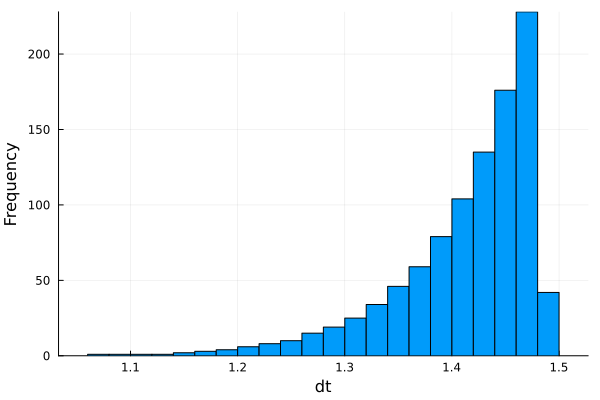

In [2]:
N = 1000
t = collect(1.0:N).^(1.05)
w = 0.008
K = 5

histogram(diff(t),legend=false,xlabel="dt",ylabel="Frequency")

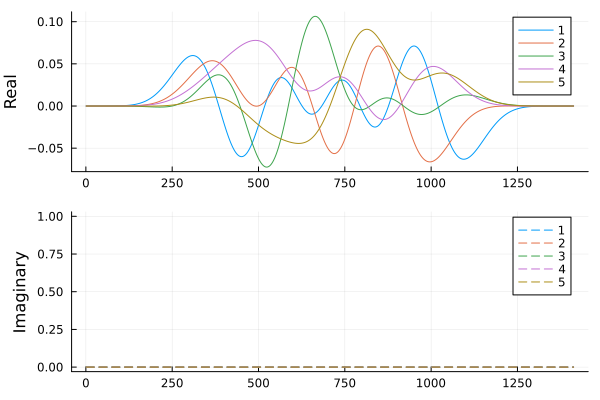

In [3]:
lamc, slepsc, cho = gpss(w, K, t, 0.0)
slepsc = cho.L*slepsc
size(slepsc)

p1 = plot(t,real.(slepsc), ylabel= "Real", label=collect(1:5)',legend=:topright)
p2 = plot(t,imag.(slepsc), ylabel= "Imaginary", label=collect(1:5)',legend=:topright,linestyle=:dash)
p = plot(p1,p2,layout = (2,1))

In [4]:
# Checking orthogonality
slepsc'*slepsc

5×5 Matrix{ComplexF64}:
    1.00001+0.0im  1.13887e-6+0.0im   5.20748e-7+0.0im  …   2.25551e-7+0.0im
 1.13887e-6-0.0im     1.00001+0.0im   6.15683e-7+0.0im      1.65185e-7+0.0im
 5.20748e-7-0.0im  6.15683e-7-0.0im      1.00001+0.0im      1.89209e-7+0.0im
 5.91444e-8-0.0im  1.83496e-6-0.0im  -3.33641e-8-0.0im     -5.25726e-7+0.0im
 2.25551e-7-0.0im  1.65185e-7-0.0im   1.89209e-7-0.0im         1.00001+0.0im

In [5]:
freqs = LinRange(-0.5, 0.5, N+1)[1:N]

ftsleps = mapreduce(k->abs2.(nufft1d3(2*pi*t, ComplexF64.(slepsc[:,k]), -1, 1e-15, collect(freqs))),hcat, 1:K)

p3 = plot(freqs[501:1000], ftsleps[501:1000,:], yscale=:log10, xscale = :log10,
    #title = "Unequally-spaced Slepians at frequency 0.0",
    legend=:false)
plot!(p3,w*[1,1],[1e-20,1e2])
plot!(p3,[1e-10, 0.5],1e-15*ones(2), label = "tolerance for FINUFFT algorithm")
plot(p,p3,layout=(1,2),size=(900,500))


LoadError: UndefVarError: `nufft1d3` not defined

In [6]:
p1 = plot(t,real.(slepsc), label=collect(1:5)',legend=:topright)
plot!(p1,t,imag.(slepsc), label=collect(1:5)',legend=:topright,linestyle=:dash)
p = plot(p1,p3,layout=(1,2),size=(900,350))

LoadError: UndefVarError: `p3` not defined

# Now we go in and produce an NFFT based estimate of the power

As promised, we get excellent concentration properties.

Finally, to enhance the look of the bandwidth choice, plot the frequency scale on a symmetric log-log plot (two axes split, one reversed, and omitting zero).

In [7]:
poshalf = Int64(round(N/2+2)):N
neghalf = 1:Int64(round(N/2))

p1a = plot(-freqs[neghalf], ftsleps[neghalf,:],title="negative freqs",
    yscale=:log10, xscale = :log10, xaxis=:flip,legend=false)
plot!(p1a, w*[1,1], [1e-22,1e2], c = :black)
p2 = plot(freqs[poshalf],ftsleps[poshalf,:],yaxis=:false,title="positive freqs",
    yscale=:log10,xscale = :log10,legend=false) #,yaxis.guide_position=:right)
plot!(p2, w*[1,1], [1e-22,1e2], c = :black)
qp = plot(p1a,p2,layout=(1,2))

pqq = plot(p1,qp,layout=(1,2),size=(900,375))


LoadError: UndefVarError: `ftsleps` not defined

Try another frequency, this time one that will give a complex taper.

In [8]:
lamc, slepsc, cho = gpss(w, K, t, 0.2)
slepsc = cho.L*slepsc
size(slepsc)

p1 = plot(t,real.(slepsc), ylabel= "Real", label=collect(1:5)',legend=false)
p2 = plot(t,imag.(slepsc), ylabel= "Imaginary", label=collect(1:5)',legend=false)
pq = plot(p1,p2,layout = (2,1))

ftsleps = mapreduce(k->abs2.(nufft1d3(2*pi*t, ComplexF64.(slepsc[:,k]), -1, 1e-15, collect(freqs))),hcat, 1:K)

p3 = plot(-freqs[neghalf], ftsleps[neghalf,:],
    yscale=:log10,xscale = :log10, xaxis=:flip,legend=false,
    title="negative freqs")
plot!(p3, w*[1,1], [1e-15,1e2], c = :black)
p4 = plot(freqs[poshalf], ftsleps[poshalf,:],
    yscale=:log10,xscale = :log10,
    title="positive freqs") #,yaxis.guide_position=:right)
plot!(p4, w*[1,1], [1e-15,1e2], c = :black)
pp = plot(p3,p4,layout=(1,2))

plot(pq,pp,layout=(1,2),size=(800,400))

LoadError: UndefVarError: `nufft1d3` not defined

In [9]:
p1 = plot(t,real.(slepsc), label=collect(1:5)',legend=false)
plot!(p1,t,imag.(slepsc), label=collect(1:5)',legend=false,linestyle=:dash)

p3 = plot(-freqs[neghalf], ftsleps[neghalf,:],
    yscale=:log10,xscale = :log10, xaxis=:flip,legend=false)
plot!(p3, w*[1,1], [1e-15,1e2], c = :black)
p4 = plot(freqs[poshalf],ftsleps[poshalf,:], legend=false,
    yscale=:log10,xscale = :log10,yaxis=false) #,yaxis.guide_position=:right)
plot!(p4, w*[1,1], [1e-15,1e2], c = :black)
pp = plot(p3,p4,layout=(1,2))

q = plot(p1,pp,layout=(1,2),size=(900,375))

LoadError: UndefVarError: `ftsleps` not defined

In [10]:
plot(pqq,q,layout=(2,1))

LoadError: UndefVarError: `pqq` not defined